In [88]:
import pandas as pd
import numpy as np

In [89]:
from keras.preprocessing import sequence

In [90]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation

In [91]:
import matplotlib.pyplot as plt

In [92]:
up1 = np.array(pd.read_csv('./trajectory/up_len36.csv'))
up2 = np.array(pd.read_csv('./trajectory/up_len37.csv'))
up3 = np.array(pd.read_csv('./trajectory/up_len37_2.csv'))
up4 = np.array(pd.read_csv('./trajectory/up_len39.csv'))
up_test = np.array(pd.read_csv('./trajectory/up_len35.csv'))

right1 = np.array(pd.read_csv('./trajectory/right_len37.csv'))
right2 = np.array(pd.read_csv('./trajectory/right_len41_2.csv'))
right3 = np.array(pd.read_csv('./trajectory/right_len39.csv'))
right4 = np.array(pd.read_csv('./trajectory/right_len41.csv'))
right_test = np.array(pd.read_csv('./trajectory/right_len38.csv'))

down1 = np.array(pd.read_csv('./trajectory/down_len34.csv'))
down2 = np.array(pd.read_csv('./trajectory/down_len35.csv'))
down3 = np.array(pd.read_csv('./trajectory/down_len35_2.csv'))
down4 = np.array(pd.read_csv('./trajectory/down_len36.csv'))
down_test = np.array(pd.read_csv('./trajectory/down_len38.csv'))

up1 = up1.reshape(1, up1.shape[0]*up1.shape[1])
up2 = up2.reshape(1, up2.shape[0]*up2.shape[1])
up3 = up3.reshape(1, up3.shape[0]*up3.shape[1])
up4 = up4.reshape(1, up4.shape[0]*up4.shape[1])
up_test = up_test.reshape(1, up_test.shape[0]*up_test.shape[1])

right1 = right1.reshape(1, right1.shape[0]*right1.shape[1])
right2 = right2.reshape(1, right2.shape[0]*right2.shape[1])
right3 = right3.reshape(1, right3.shape[0]*right3.shape[1])
right4 = right4.reshape(1, right4.shape[0]*right4.shape[1])
right_test = right_test.reshape(1, right_test.shape[0]*right_test.shape[1])

down1 = down1.reshape(1, down1.shape[0]*down1.shape[1])
down2 = down2.reshape(1, down2.shape[0]*down2.shape[1])
down3 = down3.reshape(1, down3.shape[0]*down3.shape[1])
down4 = down4.reshape(1, down4.shape[0]*down4.shape[1])
down_test = down_test.reshape(1, down_test.shape[0]*down_test.shape[1])

In [93]:
maxlen = 42*3

In [94]:
up1 = sequence.pad_sequences(up1, maxlen=maxlen, padding='post')
up2 = sequence.pad_sequences(up2, maxlen=maxlen, padding='post')
up3 = sequence.pad_sequences(up3, maxlen=maxlen, padding='post')
up4 = sequence.pad_sequences(up4, maxlen=maxlen, padding='post')
up_test = sequence.pad_sequences(up_test, maxlen=maxlen, padding='post')

right1 = sequence.pad_sequences(right1, maxlen=maxlen, padding='post')
right2 = sequence.pad_sequences(right2, maxlen=maxlen, padding='post')
right3 = sequence.pad_sequences(right3, maxlen=maxlen, padding='post')
right4 = sequence.pad_sequences(right4, maxlen=maxlen, padding='post')
right_test = sequence.pad_sequences(right_test, maxlen=maxlen, padding='post')

down1 = sequence.pad_sequences(down1, maxlen=maxlen, padding='post')
down2 = sequence.pad_sequences(down2, maxlen=maxlen, padding='post')
down3 = sequence.pad_sequences(down3, maxlen=maxlen, padding='post')
down4 = sequence.pad_sequences(down4, maxlen=maxlen, padding='post')
down_test = sequence.pad_sequences(down_test, maxlen=maxlen, padding='post')

In [95]:
dataset = np.array((up1, up2, up3, up4, right1, right2, right3, right4, down1, down2, down3, down4))
dataset = dataset.reshape(12*42, 3)
dataset.shape

(504, 3)

In [96]:
df = pd.DataFrame(data=dataset)
#df.to_csv('./trajectory/twelve_trajectory.csv', index=False, header=False)

In [97]:
x_max = max(dataset[:,0])
x_min = min(dataset[:,0])
y_max = max(dataset[:,1])
y_min = min(dataset[:,1])
z_max = max(dataset[:,2])
z_min = min(dataset[:,2])
print(x_min, x_max, y_min, y_max, z_min, z_max)

0 97 -19 278 0 56


In [98]:
dataset = np.array((up1, up2, up3, up4, right1, right2, right3, right4, down1, down2, down3, down4))
dataset = dataset.reshape(dataset.shape[0], int(dataset.shape[2]/3), 3)
dataset.shape

(12, 42, 3)

In [99]:
tmp = np.zeros((dataset.shape[0],dataset.shape[1],dataset.shape[2]))
for i in range(dataset.shape[0]):
    for j in range(dataset.shape[1]):
        tmp[i,j,0] = (dataset[i,j,0]-x_min)/(x_max-x_min)
        tmp[i,j,1] = (dataset[i,j,1]-y_min)/(y_max-y_min)-0.5
        tmp[i,j,2] = (dataset[i,j,2]-z_min)/(z_max-z_min)


In [100]:
up_test = up_test.reshape(1, int(maxlen/3), 3)
right_test = right_test.reshape(1, int(maxlen/3), 3)
down_test = down_test.reshape(1, int(maxlen/3), 3)

In [101]:
nor_up_test = np.zeros((up_test.shape[0], up_test.shape[1], up_test.shape[2]))
nor_right_test = np.zeros((right_test.shape[0], right_test.shape[1], right_test.shape[2]))
nor_down_test = np.zeros((down_test.shape[0], down_test.shape[1], down_test.shape[2]))

In [102]:
for j in range(35):
    nor_up_test[:,j,0] = (up_test[:,j,0]-x_min)/(x_max-x_min)
    nor_up_test[:,j,1] = (up_test[:,j,1]-y_min)/(y_max-y_min)-0.5
    nor_up_test[:,j,2] = (up_test[:,j,2]-z_min)/(z_max-z_min)
    
    nor_right_test[:,j,0] = (right_test[:,j,0]-x_min)/(x_max-x_min)
    nor_right_test[:,j,1] = (right_test[:,j,1]-y_min)/(y_max-y_min)-0.5
    nor_right_test[:,j,2] = (right_test[:,j,2]-z_min)/(z_max-z_min)
        
    nor_down_test[:,j,0] = (down_test[:,j,0]-x_min)/(x_max-x_min)
    nor_down_test[:,j,1] = (down_test[:,j,1]-y_min)/(y_max-y_min)-0.5
    nor_down_test[:,j,2] = (down_test[:,j,2]-z_min)/(z_max-z_min)

In [103]:
nor_up_test

array([[[ 0.81443299,  0.46632997,  0.94642857],
        [ 0.81443299,  0.42929293,  0.96428571],
        [ 0.81443299,  0.38888889,  0.98214286],
        [ 0.80412371,  0.36868687,  1.        ],
        [ 0.80412371,  0.34511785,  0.98214286],
        [ 0.80412371,  0.2979798 ,  1.        ],
        [ 0.79381443,  0.26430976,  0.98214286],
        [ 0.79381443,  0.23737374,  0.96428571],
        [ 0.79381443,  0.2003367 ,  0.96428571],
        [ 0.79381443,  0.17003367,  0.92857143],
        [ 0.78350515,  0.13973064,  0.91071429],
        [ 0.78350515,  0.10942761,  0.875     ],
        [ 0.78350515,  0.07575758,  0.83928571],
        [ 0.78350515,  0.04882155,  0.78571429],
        [ 0.77319588,  0.02861953,  0.71428571],
        [ 0.77319588, -0.00505051,  0.67857143],
        [ 0.77319588, -0.03198653,  0.60714286],
        [ 0.77319588, -0.05892256,  0.53571429],
        [ 0.77319588, -0.08922559,  0.48214286],
        [ 0.77319588, -0.11952862,  0.41071429],
        [ 0.77319588

In [104]:
y_train = np.array(pd.read_csv('./trajectory/twelve_ytrain.csv', header=None))

In [105]:
n_hidden = 512
n_classes = 3

In [106]:
from keras.layers import RepeatVector

In [107]:
n_step = tmp.shape[1]
n_input = tmp.shape[2]
model = Sequential()
model.add(LSTM(units=n_hidden, activation='tanh', batch_size=(None, n_step, n_input), unroll=True, return_sequences=True))
#model.add(LSTM(units=n_hidden, activation='tanh', batch_size=(None, n_step, n_input), unroll=True))
#model.add(RepeatVector(3))
model.add(LSTM(units=128, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=64, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=32, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=16, activation='tanh', unroll=True, return_sequences=True))
#model.add(LSTM(units=128, activation='tanh', unroll=True))
#model.add(RepeatVector(3))
model.add(LSTM(units=16, activation='tanh', unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
batch_size = 6
training_iters = 80
history = model.fit(tmp, y_train, batch_size=batch_size, epochs=training_iters)

Epoch 1/80
12/12 [==============================] - 34s 3s/step - loss: 1.0960 - acc: 0.3333
Epoch 2/80
12/12 [==============================] - 0s 15ms/step - loss: 1.0848 - acc: 0.3333
Epoch 3/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0976 - acc: 0.4167
Epoch 4/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0678 - acc: 0.3333
Epoch 5/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0427 - acc: 0.5000
Epoch 6/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0626 - acc: 0.3333
Epoch 7/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0063 - acc: 0.5833
Epoch 8/80
12/12 [==============================] - 0s 16ms/step - loss: 1.0126 - acc: 0.6667
Epoch 9/80
12/12 [==============================] - 0s 16ms/step - loss: 0.9289 - acc: 0.6667
Epoch 10/80
12/12 [==============================] - 0s 16ms/step - loss: 0.9151 - acc: 0.5833
Epoch 11/80
12/12 [==============================] - 0s 16ms

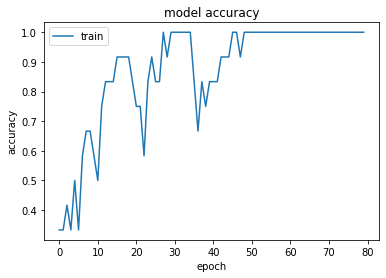

In [109]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

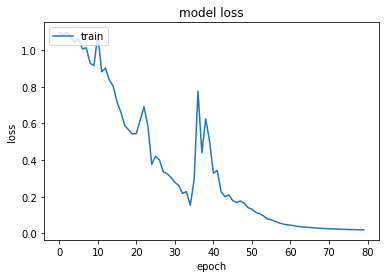

In [110]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 42, 512)           1056768   
_________________________________________________________________
lstm_19 (LSTM)               (None, 42, 128)           328192    
_________________________________________________________________
lstm_20 (LSTM)               (None, 42, 64)            49408     
_________________________________________________________________
lstm_21 (LSTM)               (None, 42, 32)            12416     
_________________________________________________________________
lstm_22 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 1,449,971
Trainable params: 1,449,971
Non-trainable params: 0
_________________________________________________________________


In [112]:
np.set_printoptions(suppress=True)
for i in range(tmp.shape[0]):
    t = tmp[i,:,:]
    t = t.reshape(1,int(maxlen/3),3)
    p = model.predict(t)
    print(i, p)

0 [[0.98244953 0.00955761 0.00799295]]
1 [[0.9834269  0.00972302 0.00685008]]
2 [[0.98257184 0.01029516 0.00713292]]
3 [[0.97998315 0.01203771 0.00797914]]
4 [[0.01031773 0.9853629  0.00431946]]
5 [[0.0182305  0.97041196 0.0113576 ]]
6 [[0.01509493 0.9752715  0.00963354]]
7 [[0.01320993 0.98166627 0.00512379]]
8 [[0.00792891 0.00687636 0.98519474]]
9 [[0.00714718 0.00696048 0.98589236]]
10 [[0.00731849 0.00693828 0.9857432 ]]
11 [[0.0079716  0.00727061 0.9847578 ]]


In [113]:
y_train

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [114]:
pred_up = model.predict(nor_up_test)
pred_right = model.predict(nor_right_test)
pred_down = model.predict(nor_down_test)

np.set_printoptions(suppress=True)
print(pred_up)
print(pred_right)
print(pred_down)

[[0.981925   0.00934569 0.0087294 ]]
[[0.02892124 0.9247117  0.04636705]]
[[0.00890752 0.00846401 0.98262846]]


In [115]:
for i in range(pred_up.shape[1]):
    if pred_up[0][i] == max(pred_up[0][:]):
        pred_up[0][i] = 1
    else:
        pred_up[0][i] = 0
        
    if pred_right[0][i] == max(pred_right[0][:]):
        pred_right[0][i] = 1
    else:
        pred_right[0][i] = 0
        
    if pred_down[0][i] == max(pred_down[0][:]):
        pred_down[0][i] = 1
    else:
        pred_down[0][i] = 0
    
print(pred_up)
print(pred_right)
print(pred_down)

[[1. 0. 0.]]
[[0. 1. 0.]]
[[0. 0. 1.]]


In [116]:
#model.save('./saved model/classifier12_97_95_86.h5')